In [1]:
import numpy as np
import pandas as pd

DATASET_FILE_PATH: str = 'data/dataset.csv'

# Load dataset
dataset = pd.read_csv(DATASET_FILE_PATH)

In [2]:
# Preview the dataset
dataset.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [11]:
# Balancing the dataset to reduce bias
# Balance the dataset by matching the number of heart disease cases with the number of non-heart disease cases
heart_disease_cases = dataset[dataset['HeartDiseaseorAttack'] == 1]
non_heart_disease_cases = dataset[dataset['HeartDiseaseorAttack'] == 0]

non_heart_disease_cases = non_heart_disease_cases.sample(n=heart_disease_cases.shape[0], random_state=42)

balanced_dataset = pd.concat([heart_disease_cases, non_heart_disease_cases])

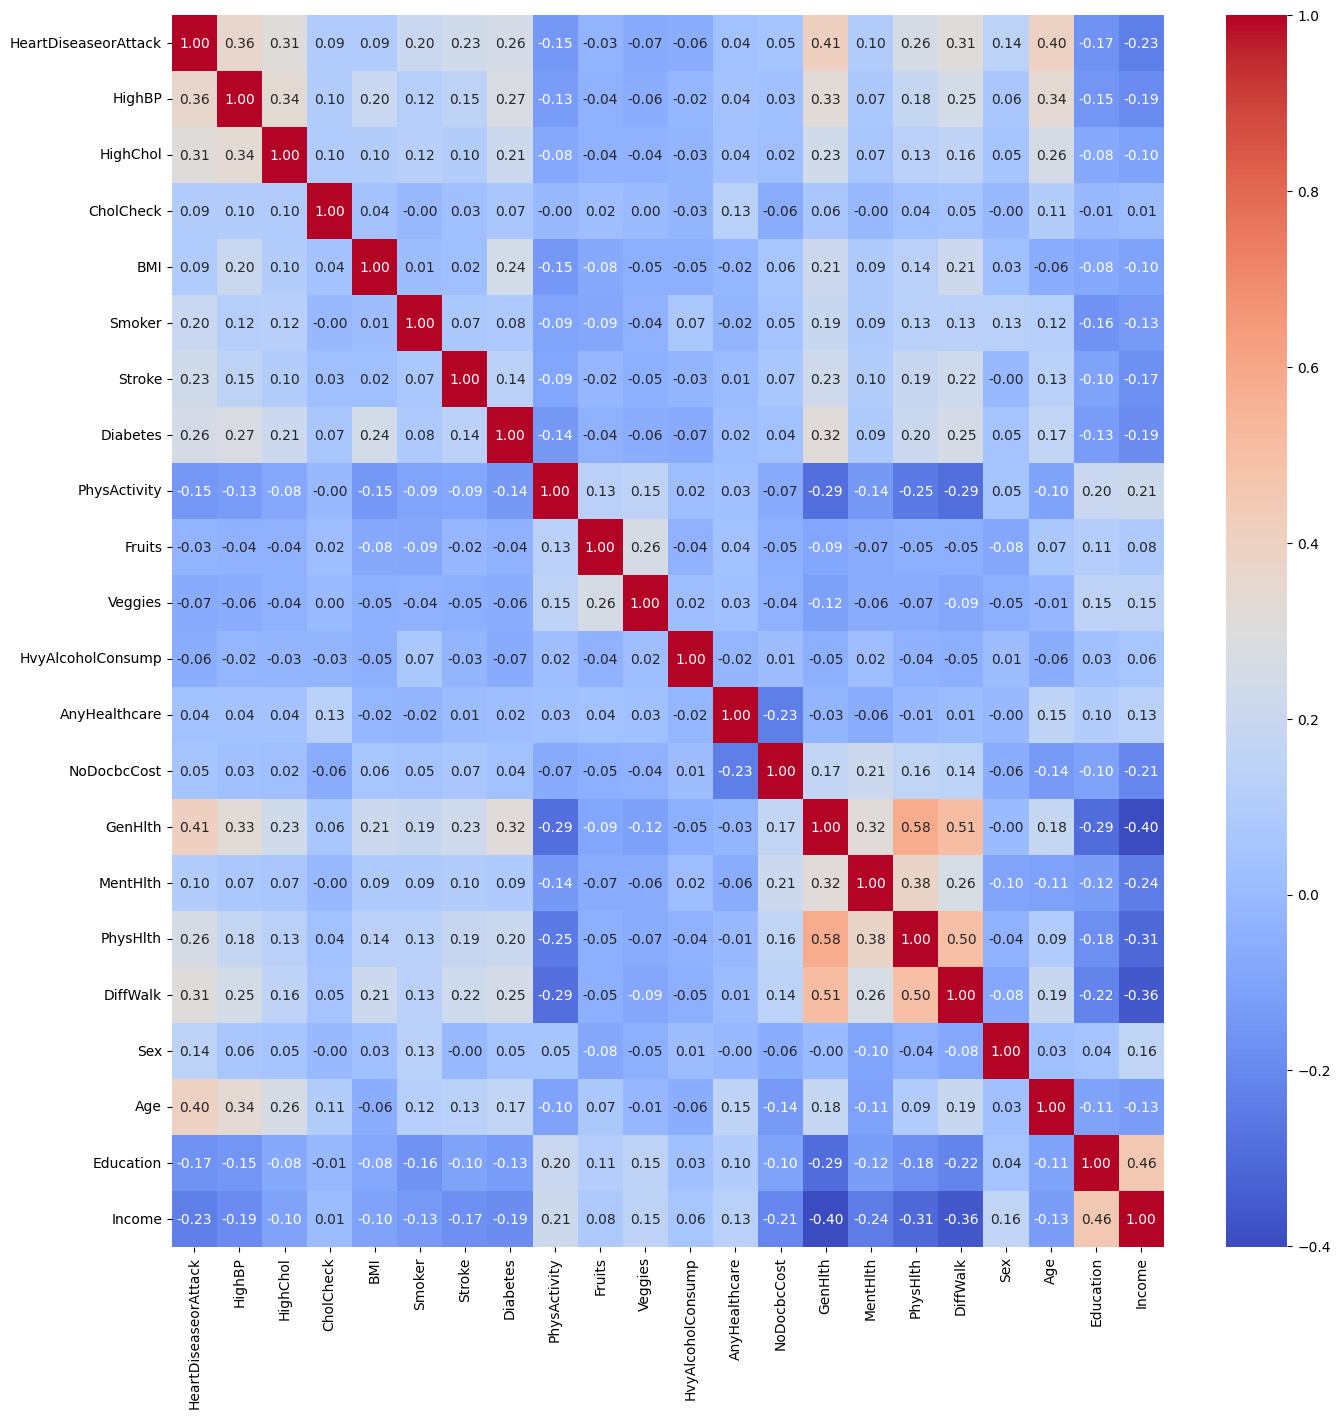

In [12]:
# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
sns.heatmap(balanced_dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [50]:
# Remove uncorrelated columns
cleaned_dataset = balanced_dataset.drop(columns=['Sex', 'HvyAlcoholConsump', 'BMI', 'AnyHealthcare', 'Fruits', 'Veggies', 'NoDocbcCost', 'MentHlth', 'CholCheck', 'PhysActivity', "DiffWalk", "PhysHlth", "Education", "Income"])

# Preview the dataset
cleaned_dataset.head()

,HeartDiseaseorAttack,HighBP,HighChol,Smoker,Stroke,Diabetes,GenHlth,Age
8,1.0,1.0,1.0,1.0,0.0,2.0,5.0,9.0
20,1.0,1.0,1.0,0.0,1.0,0.0,3.0,12.0
26,1.0,1.0,1.0,1.0,1.0,2.0,5.0,10.0
27,1.0,1.0,1.0,1.0,0.0,2.0,4.0,12.0
47,1.0,1.0,1.0,1.0,0.0,0.0,2.0,10.0


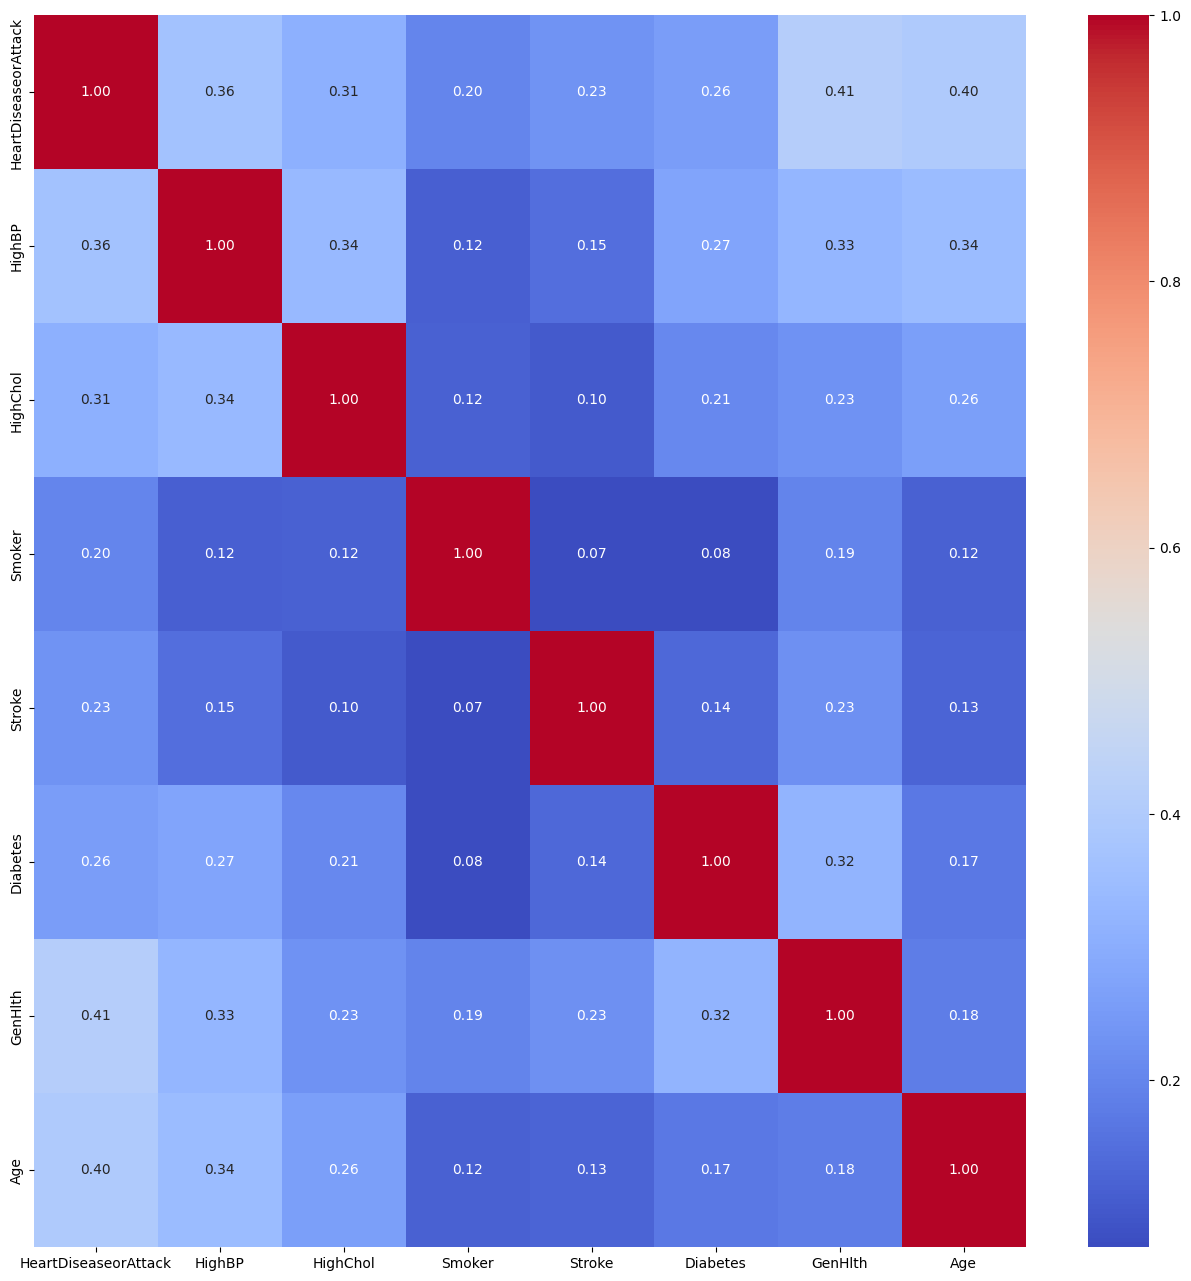

In [51]:
# Create new heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(cleaned_dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [52]:
# Test multiple classification models on the cleaned dataset, first let's split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = cleaned_dataset.drop(columns=['HeartDiseaseorAttack'])
y = cleaned_dataset['HeartDiseaseorAttack']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Test multiple classification models
from sklearn.metrics import accuracy_score

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=100000)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {logistic_regression_accuracy}')

Logistic Regression Accuracy: 0.7674199623352166


In [54]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {random_forest_accuracy}')


Random Forest Accuracy: 0.7605147520401758


In [55]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {gradient_boosting_accuracy}')

Gradient Boosting Accuracy: 0.7723373090604729


In [56]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {decision_tree_accuracy}')

Decision Tree Accuracy: 0.757899142079933


In [57]:
# Neural Network
from sklearn.neural_network import MLPClassifier

neural_network = MLPClassifier()
neural_network.fit(X_train, y_train)
y_pred = neural_network.predict(X_test)
neural_network_accuracy = accuracy_score(y_test, y_pred)
print(f'Neural Network Accuracy: {neural_network_accuracy}')

Neural Network Accuracy: 0.7718141870684243


In [58]:
# Support Vector Machine
from sklearn.svm import SVC

support_vector_machine = SVC()
support_vector_machine.fit(X_train, y_train)
y_pred = support_vector_machine.predict(X_test)
support_vector_machine_accuracy = accuracy_score(y_test, y_pred)
print(f'Support Vector Machine Accuracy: {support_vector_machine_accuracy}')


Support Vector Machine Accuracy: 0.7675245867336263


**Notice how our accuracy is rather low due to balancing the dataset, to recoup the lost data we will now implement the models using a weighted loss function.**

In [59]:
full_cleaned_dataset = dataset.drop(columns=['Sex', 'HvyAlcoholConsump', 'BMI', 'AnyHealthcare', 'Fruits', 'Veggies', 'NoDocbcCost', 'MentHlth', 'CholCheck', 'PhysActivity', "DiffWalk", "PhysHlth", "Education", "Income"])

# Preview the dataset
full_cleaned_dataset.head()

,HeartDiseaseorAttack,HighBP,HighChol,Smoker,Stroke,Diabetes,GenHlth,Age
0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,9.0
1,0.0,0.0,0.0,1.0,0.0,0.0,3.0,7.0
2,0.0,1.0,1.0,0.0,0.0,0.0,5.0,9.0
3,0.0,1.0,0.0,0.0,0.0,0.0,2.0,11.0
4,0.0,1.0,1.0,0.0,0.0,0.0,2.0,11.0


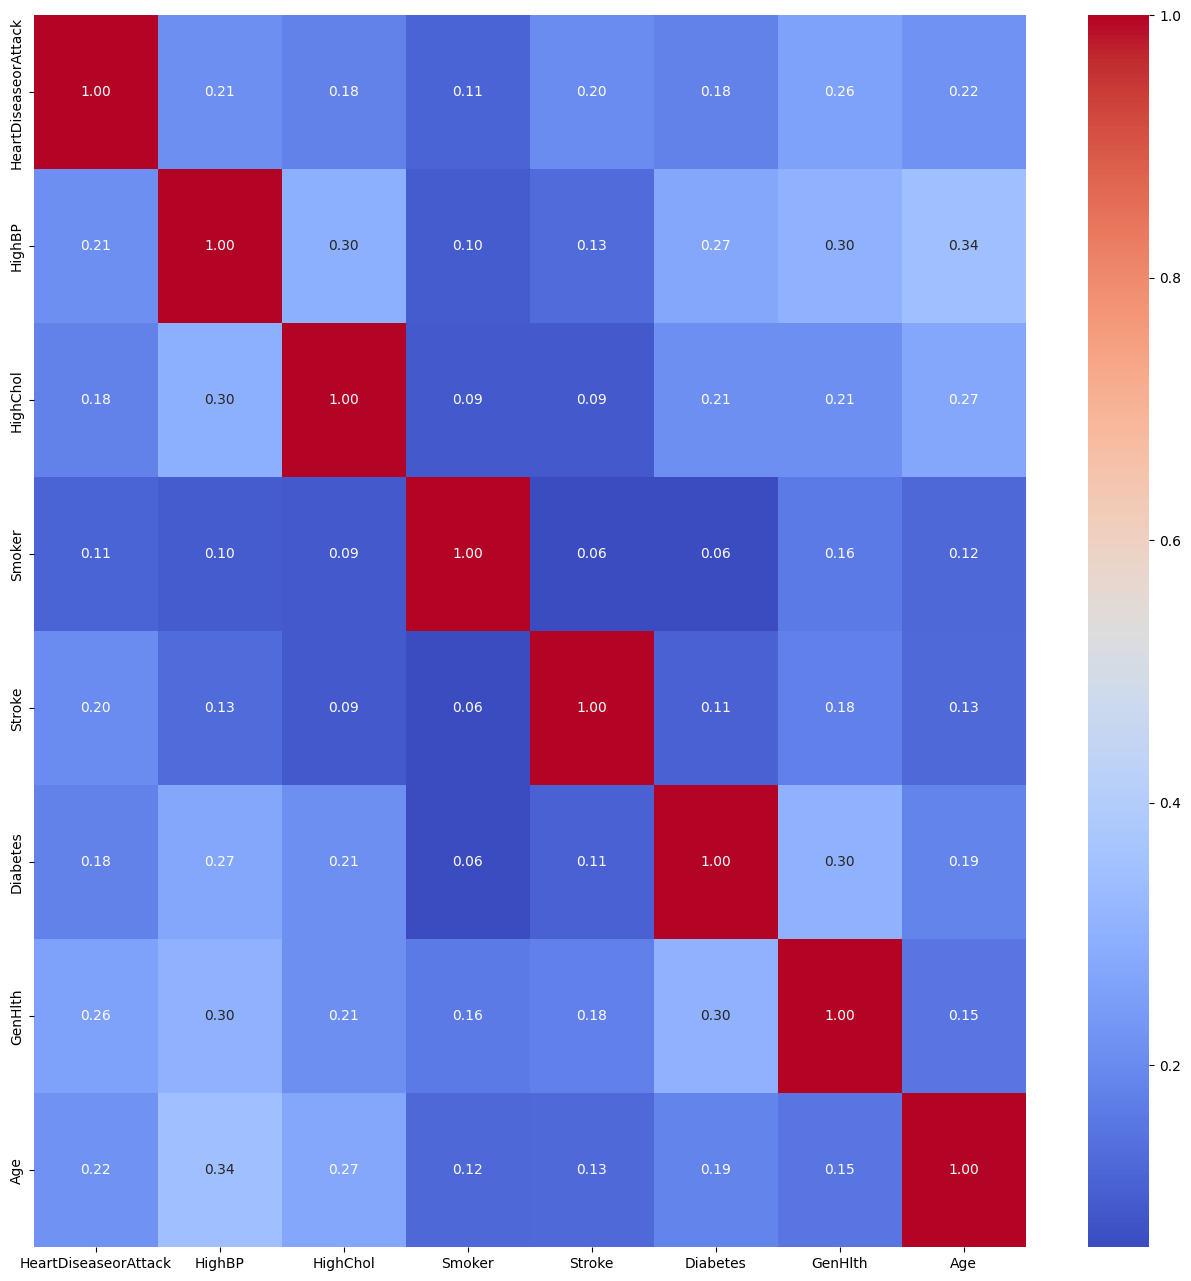

In [60]:
# Plot the correlation matrix
plt.figure(figsize=(16, 16))
sns.heatmap(full_cleaned_dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [62]:
X = full_cleaned_dataset.drop(columns=['HeartDiseaseorAttack'])
y = full_cleaned_dataset['HeartDiseaseorAttack']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
class_weights = {
    0: full_cleaned_dataset.shape[0] / (2 * np.bincount(y)[0]),
    1: full_cleaned_dataset.shape[0] / (2 * np.bincount(y)[1])
}

print(class_weights)

{0: 0.5519894511003669, 1: 5.308667810655841}


In [82]:
# Logistic Regression using weighted loss function
logistic_regression = LogisticRegression(max_iter=500_000, class_weight='balanced')
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {logistic_regression_accuracy}')

Logistic Regression Accuracy: 0.7472406181015453


In [80]:
# Random Forest using weighted loss function
random_forest = RandomForestClassifier(class_weight='balanced')
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {random_forest_accuracy}')

Random Forest Accuracy: 0.7324976348155157


In [72]:
# Gradient Boosting using weighted loss function
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {gradient_boosting_accuracy}')


Gradient Boosting Accuracy: 0.908033743298644


In [69]:
# Decision Tree using weighted loss function
decision_tree = DecisionTreeClassifier(class_weight=class_weights)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {decision_tree_accuracy}')

Decision Tree Accuracy: 0.7243574582150741


In [77]:
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(class_weight=class_weights, y=y_train)

# Neural Network using weighted loss function
neural_network = MLPClassifier()
neural_network.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = neural_network.predict(X_test)
neural_network_accuracy = accuracy_score(y_test, y_pred)
print(f'Neural Network Accuracy: {neural_network_accuracy}')

TypeError: BaseMultilayerPerceptron.fit() got an unexpected keyword argument 'sample_weight'